# Pymaceuticals Inc.

### Analysis

    1. Capomulin and Ramicane seemed to be the 2 most successful Drug Regimens considering the average tumor size of all the drugs regimens used.
    2. Ketapril and Naftisol seemed to be the 2 lease reliable Drug Regimens (even more so than the placebo) as they had the highest variance in tumor size.
    3. From the line plot of mouse l509 on Capomulin, it can be seen that there is a general downward trend in tumor size which can be used to infer that if the treatment was continued, the tumor would continue to decrease in size.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mousestudy = pd.merge(study_results, mouse_metadata, on=(["Mouse ID", "Mouse ID"]))

# Display the data table for preview
mousestudy.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [2]:
# Checks the number of mice.
mice = mousestudy["Mouse ID"].unique()
numbermice = len(mice)
numbermice

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mousestudy["Mouse ID"].value_counts()

g989    13
b128    10
q787    10
s337    10
q511    10
        ..
f932     1
b447     1
u153     1
t573     1
o848     1
Name: Mouse ID, Length: 249, dtype: int64

In [4]:
# Get all the data for the duplicate mouse ID. 
badmouse = mousestudy.loc[mousestudy["Mouse ID"] == "g989"]
badmouse

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Creates a clean DataFrame by dropping the duplicate mouse by its ID.
cleanedmouse = mousestudy.loc[mousestudy["Mouse ID"] != 'g989']
cleanedmouse.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [6]:
# Checking the number of mice in the clean DataFrame.
mice = cleanedmouse["Mouse ID"].unique()
numbermice = len(mice)
numbermice

248

## Summary Statistics

In [7]:
# Groups mice by the drug that they were given
druggrouping = cleanedmouse.groupby("Drug Regimen")

# Pulls out the mean of the tumor volume for each respective drug
tumormean = druggrouping["Tumor Volume (mm3)"].mean()

# Pulls out the median of the tumor volume for each respective drug
tumormedian = druggrouping["Tumor Volume (mm3)"].median()

# Pulls out the variance of the tumor volume for each respective drug
tumorvar = druggrouping["Tumor Volume (mm3)"].var()

# Pulls out the standard deviation of the tumor volume for each respective drug
tumorstddev = druggrouping["Tumor Volume (mm3)"].std()

# Pulls out the SEM of the tumor volume for each respective drug
tumorsem = druggrouping["Tumor Volume (mm3)"].sem()

# Places all the series generated above into a dataframe and displays the results
drugsummary = pd.DataFrame({
    "Mean Tumor Volume": tumormean, "Median Tumor Volume": tumormedian, "Tumor Volume Variance": tumorvar,
    "Tumor Volume Std. Dev.": tumorstddev, "Tumor Volume Std. Err.": tumorsem
})
drugsummary

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Creates the same dataframe as above using the agg method
drugsummaryv2 = druggrouping["Tumor Volume (mm3)"].agg(["mean", "median", "var", "std", "sem"])
drugsummaryv2

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

<AxesSubplot:title={'center':'Number of Mice per Drug Regimen'}, xlabel='Drug Regimen', ylabel='Number of Mice Tested'>

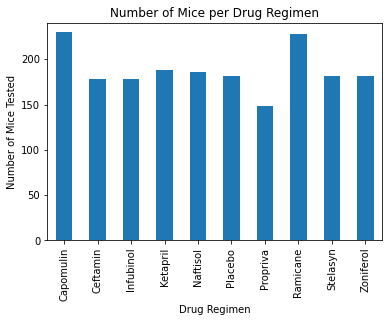

In [9]:
# Creates a series of data counting the number of mice on each drug regimen
timepoints = druggrouping["Timepoint"].count()

# Creates a bar graph using Pandas displaying the series created above
timepoints.plot(kind="bar", title="Number of Mice per Drug Regimen", ylabel="Number of Mice Tested", 
               ylim=(0, max(timepoints)+10))

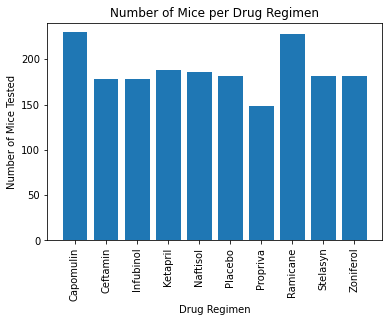

In [10]:
# Pulls the name of the drugs into an array and sorts them into alphabetical order
x_axis = cleanedmouse["Drug Regimen"].unique()
x_axis.sort()

# Plots the number of mice in each drug regimen using pyplot
plt.bar(x_axis, timepoints)
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")
plt.title("Number of Mice per Drug Regimen")
plt.xticks(rotation=90)
plt.ylim(0, max(timepoints)+10)
plt.show()

<AxesSubplot:title={'center':'Percentage of Each Gender of Mice'}, ylabel='Sex'>

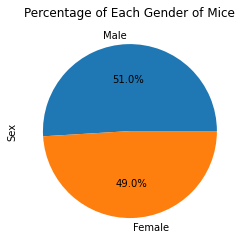

In [11]:
# Creates a series of data counting the number of male and female mice
micegender = cleanedmouse["Sex"].value_counts()

# Creates a pie chart using pandas displaying the data from the series above
micegender.plot(kind="pie", title="Percentage of Each Gender of Mice", autopct="%1.1f%%")

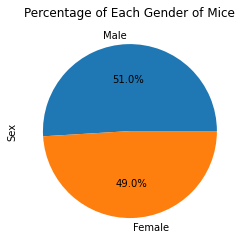

In [12]:
# Pulls an array of the genders for the mice
labels = cleanedmouse["Sex"].unique()

# Flips the array to match the data to the appropriate gender
labels = labels[::-1]

# Creates a pie chart for the percentage of each gender of mouse using pyplot
plt.pie(micegender, labels=labels, autopct="%1.1f%%")
plt.title("Percentage of Each Gender of Mice")
plt.ylabel("Sex")
plt.show()


## Quartiles, Outliers and Boxplots

In [13]:
# Groups the mice by ID and then determines the greatest timepoint for each
mouseidgroup = cleanedmouse.groupby("Mouse ID")
maxtimepoint = mouseidgroup["Timepoint"].max()

# Creates a data frame with the max timepoint
timepoint = pd.DataFrame({
    "Timepoint": maxtimepoint
})
# Resets the index to create the Mouse ID column
timepoint.reset_index()

# Merges this data frame with the cleaned mouse data frame
cleaned_maxtimepoint = pd.merge(cleanedmouse, timepoint, how="right", left_on=["Mouse ID", "Timepoint"], 
                                right_on=["Mouse ID", "Timepoint"])
cleaned_maxtimepoint.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29


In [14]:
# Creates a list of the most promising treatments for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Creates a list for capomulin containing the tumor volume at the max timepoint
capomulindf = cleaned_maxtimepoint.loc[cleaned_maxtimepoint["Drug Regimen"] == "Capomulin"]
capomulindata = capomulindf["Tumor Volume (mm3)"]

# Creates a list for ramicane containing the tumor volume at the max timepoint
ramicanedf = cleaned_maxtimepoint.loc[cleaned_maxtimepoint["Drug Regimen"] == "Ramicane"]
ramicanedata = ramicanedf["Tumor Volume (mm3)"]

# Creates a list for infubinol containing the tumor volume at the max timepoint
infubinoldf = cleaned_maxtimepoint.loc[cleaned_maxtimepoint["Drug Regimen"] == "Infubinol"]
infubinoldata = infubinoldf["Tumor Volume (mm3)"]

# Creates a list for ceftamin containing the tumor volume at the max timepoint
ceftamindf = cleaned_maxtimepoint.loc[cleaned_maxtimepoint["Drug Regimen"] == "Ceftamin"]
ceftamindata = ceftamindf["Tumor Volume (mm3)"]

# Combines all the lists above into one master list
list_treatment_data = [capomulindata, ramicanedata, infubinoldata, ceftamindata]

In [15]:
# Creates quartiles for the capomulin drug and stores upper and lower quartiles
capomulin_quartiles = capomulindata.quantile([.25, .50, .75])
capomulin_lower = capomulin_quartiles[0.25]
capomulin_upper = capomulin_quartiles[0.75]

# Determines the IQR for capomulin and resulting bounds for outliers
capomulin_iqr = capomulin_upper-capomulin_lower
capomulin_lowerbound = capomulin_lower - (1.5*capomulin_iqr)
capomulin_upperbound = capomulin_upper + (1.5*capomulin_iqr)

# Calculates any potential outliers for capomulin and outputs them
capomulin_outliers = [x for x in capomulindata if x < capomulin_lowerbound or x > capomulin_upperbound]
print(f"Capomulin's potential outliers: {capomulin_outliers}")


# Creates quartiles for the ramicane drug and stores upper and lower quartiles
ramicane_quartiles = ramicanedata.quantile([.25, .50, .75])
ramicane_lower = ramicane_quartiles[0.25]
ramicane_upper = ramicane_quartiles[0.75]

# Determines the IQR for ramicane and resulting bounds for outliers
ramicane_iqr = ramicane_upper-ramicane_lower
ramicane_lowerbound = ramicane_lower - (1.5*ramicane_iqr)
ramicane_upperbound = ramicane_upper + (1.5*ramicane_iqr)

# Calculates any potential outliers for ramicane and outputs them
ramicane_outliers = [x for x in ramicanedata if x < ramicane_lowerbound or x > ramicane_upperbound]
print(f"Ramicane's potential outliers: {ramicane_outliers}")


# Creates quartiles for the infubinol drug and stores upper and lower quartiles
infubinol_quartiles = infubinoldata.quantile([.25, .50, .75])
infubinol_lower = infubinol_quartiles[0.25]
infubinol_upper = infubinol_quartiles[0.75]

# Determines the IQR for infubinol and resulting bounds for outliers
infubinol_iqr = infubinol_upper-infubinol_lower
infubinol_lowerbound = infubinol_lower - (1.5*infubinol_iqr)
infubinol_upperbound = infubinol_upper + (1.5*infubinol_iqr)

# Calculates any potential outliers for infubinol and outputs them
infubinol_outliers = [x for x in infubinoldata if x < infubinol_lowerbound or x > infubinol_upperbound]
print(f"Infubinol's potential outliers: {infubinol_outliers}")


# Creates quartiles for the ceftamin drug and stores upper and lower quartiles
ceftamin_quartiles = ceftamindata.quantile([.25, .50, .75])
ceftamin_lower = ceftamin_quartiles[0.25]
ceftamin_upper = ceftamin_quartiles[0.75]

# Determines the IQR for ceftamin and resulting bounds for outliers
ceftamin_iqr = ceftamin_upper-ceftamin_lower
ceftamin_lowerbound = ceftamin_lower - (1.5*ceftamin_iqr)
ceftamin_upperbound = ceftamin_upper + (1.5*ceftamin_iqr)

# Calculates any potential outliers for ceftamin and outputs them
ceftamin_outliers = [x for x in ceftamindata if x < ceftamin_lowerbound or x > ceftamin_upperbound]
print(f"Ceftamin's potential outliers: {ceftamin_outliers}")

Capomulin's potential outliers: []
Ramicane's potential outliers: []
Infubinol's potential outliers: [36.3213458]
Ceftamin's potential outliers: []


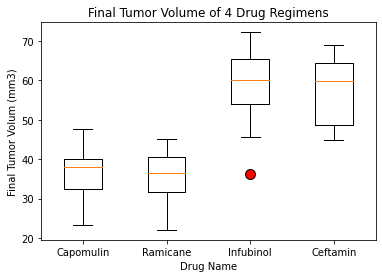

In [16]:
# Creates a box plot to qualitatively determine outlier values of the drugs
fig1, ax1 = plt.subplots()
ax1.set_title("Final Tumor Volume of 4 Drug Regimens")
ax1.set_xlabel("Drug Name")
ax1.set_ylabel("Final Tumor Volum (mm3)")
flierprops = dict(marker='o', markerfacecolor='red', markersize=10,
                  linestyle='none')
ax1.boxplot(list_treatment_data, labels=treatments, flierprops=flierprops)
plt.show()

## Line and Scatter Plots

<AxesSubplot:title={'center':'Capomulin treatment of mouse l509'}, xlabel='Timepoint', ylabel='Tumor Volume (mm3)'>

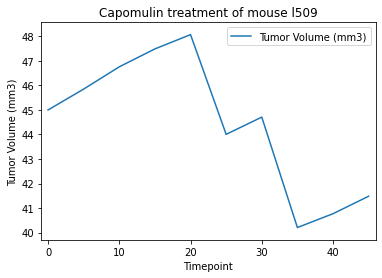

In [17]:
# Pulls the data for one mouse into a data frame
l509 = cleanedmouse.loc[cleanedmouse["Mouse ID"] == "l509"]

# Narrows the data to only timepoint and tumor volume
l509_time_tumor = l509[["Timepoint", "Tumor Volume (mm3)"]]

# Sets index to be timepoint for the x-axis labels
l509_time_tumor = l509_time_tumor.set_index("Timepoint")

# Creates a line plot of the above data frame
l509_time_tumor.plot(kind="line", title="Capomulin treatment of mouse l509", ylabel="Tumor Volume (mm3)", xlim=(-1, 46), 
                     ylim=(min(l509_time_tumor["Tumor Volume (mm3)"]-0.5), max(l509_time_tumor["Tumor Volume (mm3)"]+0.5)))

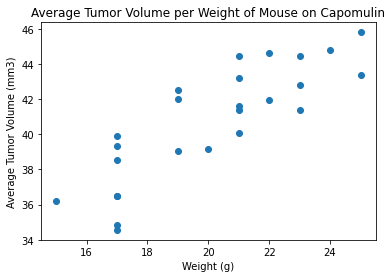

In [18]:
# Pulls out only the Capomulin treated mice and groups by ID
capomulindf = cleanedmouse.loc[cleanedmouse["Drug Regimen"] == "Capomulin"]
groupedcapomulin = capomulindf.groupby("Mouse ID")

# Pulls the average tumor size and average weight of each mouse into a series
averagetumor = groupedcapomulin["Tumor Volume (mm3)"].mean()
averageweight = groupedcapomulin["Weight (g)"].mean()

# Creates a scatter plot displaying the average tumor volume vs weight of mouse on the drug Capomulin
plt.scatter(averageweight, averagetumor)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Average Tumor Volume per Weight of Mouse on Capomulin")
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


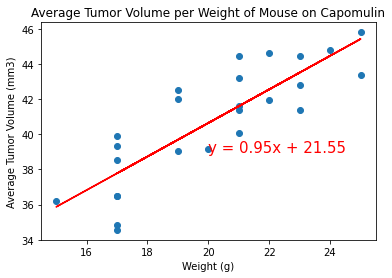

In [19]:
# Sets up the linear regression line
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(averageweight, averagetumor)
regress_values = averageweight * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Creates a scatter plot displaying the average tumor volume vs weight of mouse on the drug Capomulin
plt.scatter(averageweight, averagetumor)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Average Tumor Volume per Weight of Mouse on Capomulin")

# Plots the linear regression line and gives its equation
plt.plot(averageweight, regress_values, "r-")
plt.annotate(line_eq, (20, 39), fontsize=15, color="red")

# Outputs the correlation of the scatterplot
print(f"The correlation between mouse weight and the average tumor volume is {round(rvalue, 2)}")
plt.show()